In [100]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import re
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import interp1d, CubicSpline
from sklearn.ensemble import RandomForestRegressor

이제 3가지 유형으로 빈 자리를 채우고  
1. 계단형
2. 직선형
3. spline
성능을 계산해보자

In [3]:
df = pd.read_csv('total_data.csv')

In [4]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

In [5]:
df.head()

,date,Amazon_close,Amazon_volume,Amazon_change,AMD_close,AMD_volume,AMD_change,APPLE_close,APPLE_volume,APPLE_change,...,TSMC_change,UMC_close,UMC_volume,UMC_change,USDollarIndex_close,USDollarIndex_volume,USDollarIndex_change,USD_KRW_close,USD_KRW_volume,USD_KRW_change
0,2006-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012.82,0.0,0.53
1,2006-01-03,46.25,7580000.0,0.91,32.40,16649999.0,5.88,10.68,201850000.0,3.99,...,3.6518,4.266,5350000.0,2.24,89.84,0.0,-1.46,1004.50,0.0,-0.82
2,2006-01-04,46.69,7440000.0,-0.69,32.56,11300000.0,0.49,10.71,155230000.0,0.28,...,1.7457,4.212,3150000.0,-1.87,89.14,0.0,-0.78,998.35,0.0,-0.61
3,2006-01-05,47.11,5420000.0,0.85,33.68,13810000.0,3.44,10.63,112400000.0,-0.75,...,1.9777,4.212,8760000.0,-0.33,89.33,0.0,0.21,994.75,0.0,-0.36
4,2006-01-06,47.32,6150000.0,0.46,33.78,13310000.0,0.30,10.90,176140000.0,2.54,...,1.7525,4.239,13450000.0,4.48,88.85,0.0,-0.54,989.30,0.0,-0.55


In [9]:
krx = df[['date', 'KRXsemiconductor_close']]

In [10]:
# 일단 2가지로 a
spline = pd.read_csv('bloomberg_total_index.csv')

In [11]:
# 필요 없는 column drop
spline.drop('Unnamed: 0', axis = 1, inplace = True)

In [12]:
krx['date'] = pd.to_datetime(krx['date'])
spline['date'] = pd.to_datetime(spline['date'])

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df = pd.merge(krx, spline, how = 'left', on = 'date')

In [10]:
df.to_csv('bloomberg_for_linear_daily.csv')

In [14]:
df['KRXsemiconductor_close'] = df['KRXsemiconductor_close'].map(lambda x: '' if str(x) == 'nan' else x)

In [15]:
df['KRXsemiconductor_close'] = df['KRXsemiconductor_close'].map(lambda x: re.sub(",", "", str(x)))

In [16]:
df['KRXsemiconductor_close'] = pd.to_numeric(df['KRXsemiconductor_close'] )

In [17]:
# date 빼고 다 numeric type으로 만들자
for i in range(len(df.columns)):
    col_name = df.columns[i]
    if col_name == 'date':
        pass
    else:
        df[col_name] = pd.to_numeric(df[col_name])

In [18]:
# 이씨 nan은 왜 나온거지 전 코드에는 포함이 안되어 있었는데
# 어쨌거나 새로 저장하자
df.to_csv('bloomberg_for_spline_daily.csv')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5051 entries, 0 to 5050
Columns: 142 entries, date to KOGCSTOQIndex
dtypes: datetime64[ns](1), float64(141)
memory usage: 5.5 MB


In [21]:
df.head()

,date,KRXsemiconductor_close,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,2006-01-02,1000.00,NaN,NaN,4.0736,4.3911,86.0274,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-03,1012.36,4.25,4.25,4.1144,4.3637,85.0983,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2006-01-04,1007.17,4.25,4.25,4.1798,4.3422,84.5642,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2006-01-05,991.68,4.25,4.25,4.1793,4.3519,84.7247,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006-01-06,1008.15,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


이 지점부터 daily에 비례해서 interpolation하자

In [22]:
df.reset_index(inplace = True)

In [23]:
df['date'] = pd.to_datetime(df['date'])

In [24]:
# 다른 것과 다르게 이건 date를 기준으로 interpolation 하기 때문에 index화가 필요하다a
df.set_index('date', inplace = True)

In [25]:
df['INJCJCIndex'].isnull().sum()

4330

In [26]:
df['INJCJCIndex'][0:50]

date
2006-01-02      NaN
2006-01-03      NaN
2006-01-04      NaN
2006-01-05      NaN
2006-01-06    326.0
2006-01-07      NaN
2006-01-08      NaN
2006-01-09      NaN
2006-01-10      NaN
2006-01-11      NaN
2006-01-12      NaN
2006-01-13    285.0
2006-01-14      NaN
2006-01-15      NaN
2006-01-16      NaN
2006-01-17      NaN
2006-01-18      NaN
2006-01-19      NaN
2006-01-20    290.0
2006-01-21      NaN
2006-01-22      NaN
2006-01-23      NaN
2006-01-24      NaN
2006-01-25      NaN
2006-01-26      NaN
2006-01-27    282.0
2006-01-28      NaN
2006-01-29      NaN
2006-01-30      NaN
2006-01-31      NaN
2006-02-01      NaN
2006-02-02      NaN
2006-02-03    289.0
2006-02-04      NaN
2006-02-05      NaN
2006-02-06      NaN
2006-02-07      NaN
2006-02-08      NaN
2006-02-09      NaN
2006-02-10    298.0
2006-02-11      NaN
2006-02-12      NaN
2006-02-13      NaN
2006-02-14      NaN
2006-02-15      NaN
2006-02-16      NaN
2006-02-17    283.0
2006-02-18      NaN
2006-02-19      NaN
2006-02-20     

In [ ]:
#cubicDT = wideDT.interpolate(axis = 0, method = 'cubic', limit_area = 'inside')

In [27]:
df['INJCJCIndex'].interpolate(method = 'cubic', limit_area = 'inside').isnull().sum()

10

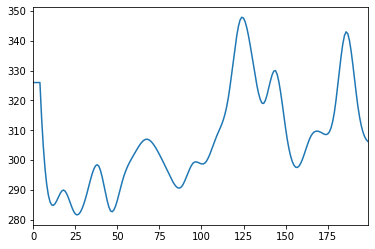

In [111]:
df['INJCJCIndex'].interpolate(method = 'cubic', limit_area = 'inside')[0:200].plot()

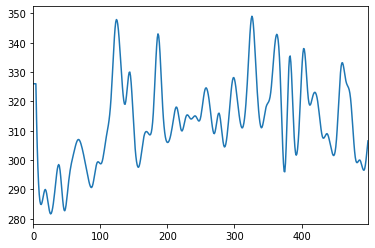

In [109]:
df['INJCJCIndex'].interpolate()[0:500].plot()

In [28]:
df['INJCJCIndex'].interpolate(method = 'cubic', limit_area = 'inside')[0:50]

date
2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06    326.000000
2006-01-07    314.123680
2006-01-08    304.664374
2006-01-09    297.375710
2006-01-10    292.011313
2006-01-11    288.324811
2006-01-12    286.069831
2006-01-13    285.000000
2006-01-14    284.868944
2006-01-15    285.430291
2006-01-16    286.437666
2006-01-17    287.644698
2006-01-18    288.805013
2006-01-19    289.672238
2006-01-20    290.000000
2006-01-21    289.616287
2006-01-22    288.646533
2006-01-23    287.290534
2006-01-24    285.748086
2006-01-25    284.218983
2006-01-26    282.903023
2006-01-27    282.000000
2006-01-28    281.665909
2006-01-29    281.881537
2006-01-30    282.583871
2006-01-31    283.709898
2006-02-01    285.196604
2006-02-02    286.980976
2006-02-03    289.000000
2006-02-04    291.171974
2006-02-05    293.340440
2006-02-06    295.330251
2006-02-07    296.966259
2006-02-08    298.073318
2006-02-09    298.476281
2006-02-10    298.00

In [32]:
df['INJCJCIndex'].interpolate()[0:50]

date
2006-01-02           NaN
2006-01-03           NaN
2006-01-04           NaN
2006-01-05           NaN
2006-01-06    326.000000
2006-01-07    320.142857
2006-01-08    314.285714
2006-01-09    308.428571
2006-01-10    302.571429
2006-01-11    296.714286
2006-01-12    290.857143
2006-01-13    285.000000
2006-01-14    285.714286
2006-01-15    286.428571
2006-01-16    287.142857
2006-01-17    287.857143
2006-01-18    288.571429
2006-01-19    289.285714
2006-01-20    290.000000
2006-01-21    288.857143
2006-01-22    287.714286
2006-01-23    286.571429
2006-01-24    285.428571
2006-01-25    284.285714
2006-01-26    283.142857
2006-01-27    282.000000
2006-01-28    283.000000
2006-01-29    284.000000
2006-01-30    285.000000
2006-01-31    286.000000
2006-02-01    287.000000
2006-02-02    288.000000
2006-02-03    289.000000
2006-02-04    290.285714
2006-02-05    291.571429
2006-02-06    292.857143
2006-02-07    294.142857
2006-02-08    295.428571
2006-02-09    296.714286
2006-02-10    298.00

In [36]:
df.isna().sum().sum()

671094

In [37]:
df.interpolate().isna().sum().sum()

5755

In [43]:
df = df.interpolate(method = 'cubic', limit_area = 'inside')

근데 사잇값이 없는 경우는 어쩔 수 없이 bfill을 해야겠다.

In [44]:
df = df.fillna(method = 'bfill')

In [48]:
df = df.fillna(method = 'ffill')

In [49]:
df.isna().sum().sum()

0

In [50]:
df.to_csv('bloomberg_for_spline.csv')

In [53]:
df.reset_index(inplace = True)

In [54]:
date = df.date

In [55]:
df.drop('date', axis = 1, inplace = True)

In [58]:
df.head()

,index,KRXsemiconductor_close,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,0,1000.00,4.25,4.25,4.0736,4.3911,86.0274,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
1,1,1012.36,4.25,4.25,4.1144,4.3637,85.0983,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2,2,1007.17,4.25,4.25,4.1798,4.3422,84.5642,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
3,3,991.68,4.25,4.25,4.1793,4.3519,84.7247,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
4,4,1008.15,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,398.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6


In [60]:
df.drop('index', axis = 1, inplace = True)

In [61]:
y_target = df['KRXsemiconductor_close']

In [62]:
X_data = df.drop('KRXsemiconductor_close', axis = 1, inplace = False)

In [63]:
X_data.head()

,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,4.25,4.25,4.0736,4.3911,86.0274,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
1,4.25,4.25,4.1144,4.3637,85.0983,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
2,4.25,4.25,4.1798,4.3422,84.5642,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
3,4.25,4.25,4.1793,4.3519,84.7247,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6
4,4.25,4.25,4.1985,4.3733,84.3844,326.0,2561.0,398.0,310.0,278.0,...,-198.2,13.6,5.2,3.0,-0.7,5.2,-5.67,5.6,2.9,0.6


In [64]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [65]:
lr = LinearRegression()

In [66]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [67]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [68]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  2238.122, RMSE : 47.309
Variance Score : 0.990290


In [69]:
# intercept, coefficients 확인
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : -13870.990651271377
회귀 계수 값 : [-6.82260028e+10  6.82260027e+10  7.40000000e+00  1.16000000e+02
 -8.20000000e+00  1.00000000e-01  0.00000000e+00  0.00000000e+00
 -7.00000000e-01  3.00000000e-01  2.00000000e-01  3.30000000e+00
 -9.00000000e-01  1.70000000e+00 -3.00000000e+00  4.62000000e+01
  1.20000000e+00 -1.67900000e+02 -1.95000000e+01 -1.27000000e+01
  1.59400000e+02  1.18200000e+02  2.60000000e+00 -1.91000000e+01
 -1.90000000e+00 -9.58000000e+01 -4.00000000e-01  3.70000000e+00
  6.25000000e+01 -2.10000000e+00  2.86000000e+01 -2.47000000e+01
 -3.70000000e+00 -6.80000000e+00  4.40000000e+00  1.00000000e+00
  0.00000000e+00  0.00000000e+00  2.00000000e-01 -0.00000000e+00
 -1.00000000e-01  1.41000000e+01 -1.49000000e+01 -2.31000000e+01
  1.50000000e+01  2.90000000e+00 -1.61000000e+01 -1.26000000e+01
  3.26000000e+01 -4.50000000e+00 -3.33000000e+01 -3.62000000e+01
  3.95000000e+01  3.00000000e+00 -3.35000000e+01  1.43000000e+01
 -1.58000000e+01 -1.00000000e+00  1.06000000e+01  1.8

In [70]:
# 피쳐별 회귀 계수 값으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

FDTRIndex_y      6.822600e+10
KOECPRCYIndex    3.887000e+02
OEUSKLARIndex    2.419000e+02
USHEYOYIndex     1.594000e+02
GDPCYOYIndex     1.554000e+02
                     ...     
CPTICHNGIndex   -2.361000e+02
KOECFCOYIndex   -3.161000e+02
CPUPXCHGIndex   -3.907000e+02
MGT2REIndex     -3.146400e+03
FDTRIndex_x     -6.822600e+10
Length: 140, dtype: float64

Standard Scaler를 써서 다시 해보기

In [73]:
y_target = df['KRXsemiconductor_close']

In [74]:
X_data = df.drop('KRXsemiconductor_close', axis = 1, inplace = False)

In [75]:
col_name = X_data.columns

In [76]:
X_data = StandardScaler().fit_transform(X_data)

In [77]:
X_data = pd.DataFrame(X_data, columns = col_name)

In [78]:
X_data.head()

,FDTRIndex_x,FDTRIndex_y,USGG3MIndex,USGG10YRIndex,USTW$Index,INJCJCIndex,INJCSPIndex,USEMNCHGIndex,NFPPCHIndex,NFPTCHIndex,...,USCABALIndex,JNVNIYOYIndex,COSTNFR%Index,KOGNICNYIndex,KODFTOTYIndex,KOGNICUYIndex,EHCAUSIndex,KOGCGDPYIndex,PRODNFR%Index,KOGCSTOQIndex
0,1.703416,1.703416,1.793907,1.545836,0.587399,-0.139676,-0.34784,0.944723,0.948862,0.768354,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
1,1.703416,1.703416,1.819072,1.517702,0.469118,-0.139676,-0.34784,0.944723,0.948862,0.768354,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
2,1.703416,1.703416,1.859409,1.495627,0.401123,-0.139676,-0.34784,0.944723,0.948862,0.768354,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
3,1.703416,1.703416,1.859101,1.505587,0.421556,-0.139676,-0.34784,0.944723,0.948862,0.768354,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704
4,1.703416,1.703416,1.870943,1.527559,0.378234,-0.139676,-0.34784,0.944723,0.948862,0.768354,...,-2.097341,1.310912,0.87787,-0.168127,-1.791813,-0.042693,-2.041472,0.183274,0.64039,-0.600704


In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 156)

In [80]:
lr = LinearRegression()

In [81]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [82]:
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [83]:
print('MSE: {0: .3f}, RMSE : {1:.3F}'.format(mse, rmse))
print('Variance Score : {0:3f}'.format(r2_score(y_test, y_pred)))

MSE:  2239.612, RMSE : 47.325
Variance Score : 0.990283


In [84]:
# intercept, coefficients 확인
print('절편 값 :', lr.intercept_)
print('회귀 계수 값 :', np.round(lr.coef_, 1))

절편 값 : 1656.5479464254645
회귀 계수 값 : [-6.9900e+01 -6.9900e+01  1.1500e+01  1.1330e+02 -6.4200e+01  1.5000e+01
  4.3600e+01  3.8000e+00 -1.4710e+02  6.1100e+01  1.0800e+01  4.8900e+01
 -1.6100e+01  1.5200e+01 -4.4000e+01  1.5300e+01  3.0000e-01 -2.1600e+01
 -2.4500e+01 -1.2600e+01  1.2550e+02  2.3930e+02  1.6100e+02 -4.5500e+01
 -2.6700e+01 -7.5190e+02 -9.9000e+00  2.3800e+01  4.9820e+02 -1.5400e+01
  5.6000e+00 -1.1340e+02 -3.6200e+01 -8.3600e+01  7.0000e+00  9.6400e+01
  9.6900e+01  2.7000e+01  1.0708e+03 -1.8710e+02 -2.2000e+00  1.2170e+02
 -1.9200e+02 -1.8490e+02  1.1480e+02  1.9900e+01 -1.0240e+02 -8.5600e+01
  1.4750e+02 -1.0400e+01 -6.5600e+01 -8.1600e+01  8.3800e+01  6.6000e+00
 -1.2580e+02  3.4200e+01 -1.8500e+01 -2.7000e+00  9.3000e+00  1.2100e+01
 -1.8100e+01 -1.1200e+01  5.9400e+01  1.0200e+01  3.4100e+01 -1.2970e+02
  5.0000e-01  1.1040e+02 -4.0000e+00 -1.0800e+02 -2.7400e+01 -1.4100e+01
 -2.8800e+01  8.2500e+01  1.0253e+03 -8.5480e+02  1.8241e+03  9.4250e+02
 -4.0280e+02  3

In [85]:
# 피쳐별 회귀 계수 값으로 정렬
coeff = pd.Series(data = np.round(lr.coef_, 1), index = X_data.columns)
coeff.sort_values(ascending = False)

SKLILIIndex      1824.1
OEUSKLARIndex    1716.1
NFPTIndex        1070.8
KOIPMSIndex      1025.3
SKLILCIndex       942.5
                  ...  
CPTICHNGIndex    -746.2
KOCPIIndex       -751.9
PIDSPINXIndex    -782.2
KOIPISAIndex     -854.8
GDPCUR$Index    -3666.8
Length: 140, dtype: float64

In [86]:
# Ridge regression, alpha = 10
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [87]:
print(' 5 folds의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 3))
print(' 5 folds의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 folds의 개별 Negative MSE scores :  [ -23125.996 -134920.086 -167300.765 -127135.41  -133723.35 ]
 5 folds의 개별 RMSE scores :  [152.072 367.315 409.024 356.561 365.682]
 5 folds의 평균 RMSE : 330.131


In [88]:
# alpha 값 변경에 따른 RMSE 체크
alphas = [0, 0.1, 1, 10, 100]

# alpha list 값 변경해가며 평균 RMSE 측정
for alpha in alphas:
    ridge = Ridge(alpha = alpha)
    
    # cross validation score를 이용해서 5 fold 의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0}일 때 5 fold의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.15698e-19): result may not be accurate.
  overwrite_a=True).T
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.73148e-18): result may not be accurate.
  overwrite_a=True).T
/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.6608e-18): result may not be accurate.
  overwrite_a=True).T


alpha 0일 때 5 fold의 평균 RMSE : 159510.364
alpha 0.1일 때 5 fold의 평균 RMSE : 580.837
alpha 1일 때 5 fold의 평균 RMSE : 442.510
alpha 10일 때 5 fold의 평균 RMSE : 330.131
alpha 100일 때 5 fold의 평균 RMSE : 344.145


/Users/mokpolar/opt/anaconda3/envs/tf-py36/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.64699e-18): result may not be accurate.
  overwrite_a=True).T


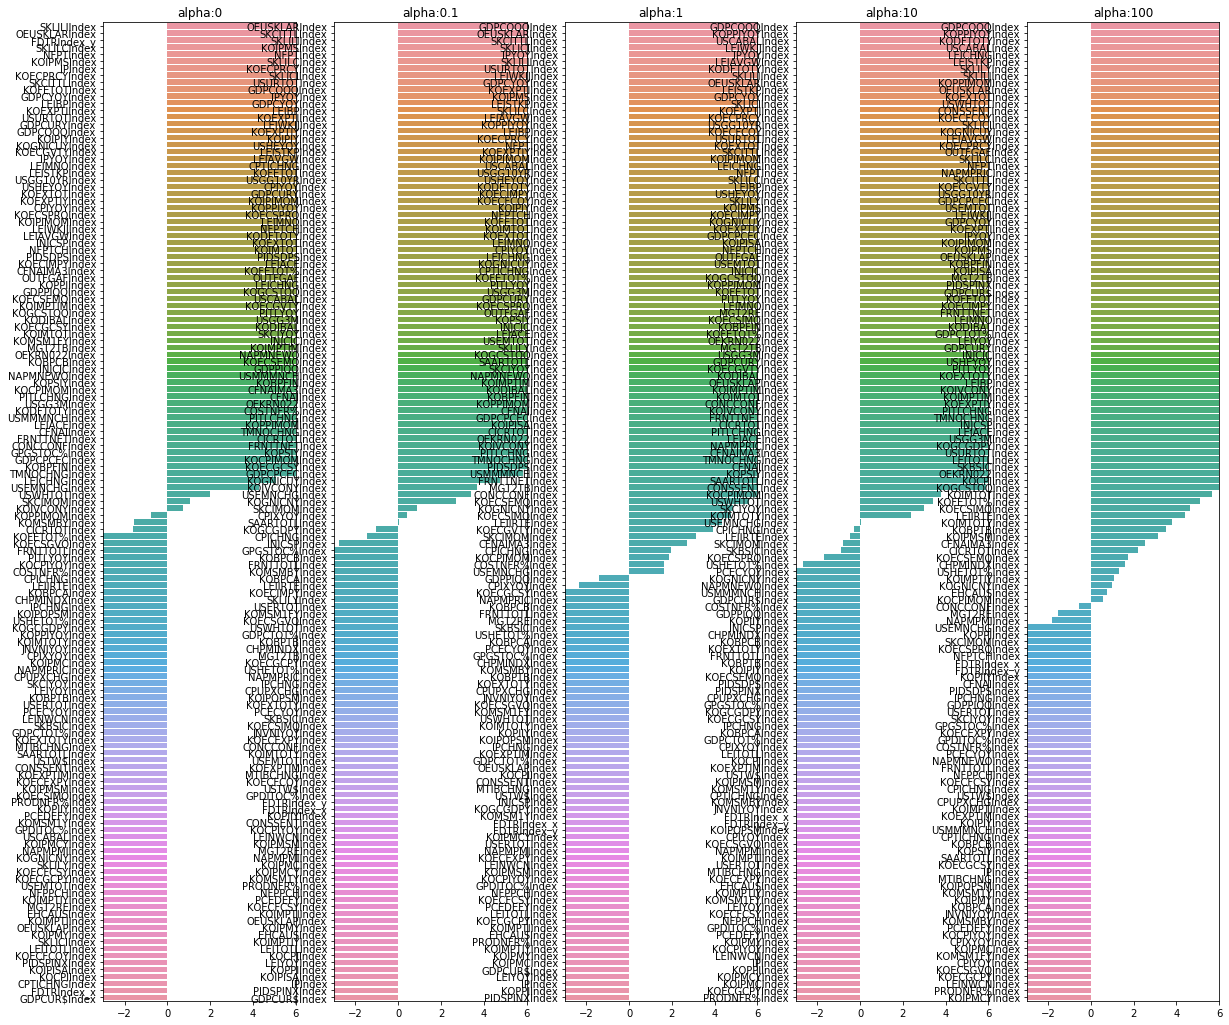

In [89]:
# alpha 값의 변화에 따른 피쳐의 회귀 계수값을 시각화
# 5열 matplotlib 축 생성
fig, axs = plt.subplots(figsize = (20, 18), nrows = 1, ncols = 5)

# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 
coeff_df = pd.DataFrame()

# alpha 리스트 값을 차례로 입력해 회귀계수 값 시각화 및 데이터 저장
# pos는 axis 위치 지정
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data, y_target)
    # alpha 에 따른 피쳐별로 회귀 계수를 Series로 변환하고 이를 DataFrame 컬럼으로 추가
    coeff = pd.Series(data = ridge.coef_, index = X_data.columns)
    colname = 'alpha:' + str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. sorting
    coeff = coeff.sort_values(ascending = False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x = coeff.values, y = coeff.index, ax = axs[pos])

plt.show()
    

In [90]:
# alpha값을 증가시킬 수록 회귀 계쑤값이 작아지는 것 확인
# DataFrame에 저장된 alpha값의 변화에 따른 Ridge 회귀계수값 확인
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:' + str(ridge_alphas[0])
coeff_df.sort_values(by = sort_column, ascending = False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
SKLILIIndex,1651.070188,440.939776,189.628003,74.881194,39.463937
OEUSKLARIndex,1634.257438,843.327679,237.370445,74.765293,36.188084
FDTRIndex_y,1529.866687,-63.752671,-59.778769,-30.103191,-6.256131
SKLILCIndex,1482.481314,357.521397,127.140292,45.538438,25.270933
NFPTIndex,1008.527275,416.281200,106.655792,46.123512,23.662425
...,...,...,...,...,...
KOIPISAIndex,-828.146511,-277.844629,14.607903,29.461144,18.927639
KOCPIIndex,-850.278156,-245.202749,-40.430837,-23.135076,6.343577
CPTICHNGIndex,-908.770793,107.431559,38.284490,-26.775242,-19.196790
FDTRIndex_x,-1671.395383,-63.752671,-59.778769,-30.103191,-6.256131


In [91]:
coeff_df['alpha:100'].sort_values(ascending = False)

GDPCQOQIndex      77.018888
KOPPIYOYIndex     62.367964
KODFTOTYIndex     53.658803
USCABALIndex      50.575191
LEICHNGIndex      48.428147
                    ...    
KOECSGVQIndex    -40.086091
KOECGCPYIndex    -42.270835
LEINWCNIndex     -45.080345
PRODNFR%Index    -47.465933
KOIPMCYIndex    -101.226269
Name: alpha:100, Length: 140, dtype: float64

In [92]:
coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False)

GDPCQOQIndex     77.018888
KOPPIYOYIndex    62.367964
KODFTOTYIndex    53.658803
USCABALIndex     50.575191
LEICHNGIndex     48.428147
                   ...    
USHETOT%Index     1.313263
KOIMPTIYIndex     1.079658
KOGNICNYIndex     0.989811
EHCAUSIndex       0.746437
KOCPIMOMIndex     0.549459
Name: alpha:100, Length: 83, dtype: float64

In [93]:
len(coeff_df[coeff_df['alpha:100'] > 0]['alpha:100'].sort_values(ascending = False))

83

그러니까 여기까지 정리하면 StandardScaler를 적용했을 때,  
일단 분석에 유의미한 영향을 주는 회귀 계수 0이상의 변수만 봤을 때 그 갯수는 65개임

In [94]:
a = coeff_df[coeff_df['alpha:100'] > 0]['alpha:100']

In [95]:
a = a.index

In [96]:
a = list(a)

In [97]:
a

['USGG3MIndex',
 'USGG10YRIndex',
 'INJCJCIndex',
 'INJCSPIndex',
 'OUTFGAFIndex',
 'KOIMTOTYIndex',
 'KOFETOT%Index',
 'KOEXTOTYIndex',
 'KOCPIMOMIndex',
 'USHETOT%Index',
 'USHEYOYIndex',
 'USURTOTIndex',
 'KOFETOTIndex',
 'NAPMPRICIndex',
 'KOCPIIndex',
 'SKCITTLIndex',
 'CHPMINDXIndex',
 'USWHTOTIndex',
 'SKBSICIndex',
 'CONSSENTIndex',
 'LEIWKIJIndex',
 'KOEXTOTIndex',
 'KOIMTOTIndex',
 'NFPTIndex',
 'USEMTOTIndex',
 'KOIVCONYIndex',
 'KOEXPTIYIndex',
 'KOIMPTIYIndex',
 'LEIYOYIndex',
 'IPYOYIndex',
 'KOIPMSMIndex',
 'KOIPIMOMIndex',
 'TMNOCHNGIndex',
 'KOIMPTIMIndex',
 'LEIIRTEIndex',
 'PITLYOYIndex',
 'PITLCHNGIndex',
 'KOPPIYOYIndex',
 'CFNAIMA3Index',
 'LEICHNGIndex',
 'LEIACEIndex',
 'SKLILYIndex',
 'KOPPIMOMIndex',
 'KOIPMSIndex',
 'KOIPISAIndex',
 'SKLILIIndex',
 'SKLILCIndex',
 'SKLICIIndex',
 'LEIAVGWIndex',
 'LEITOTLIndex',
 'KOEXPTIIndex',
 'LEISTKPIndex',
 'LEIBPIndex',
 'PIDSPINXIndex',
 'LEIMNOIndex',
 'KOBPFINIndex',
 'KOBPTBIndex',
 'KODIBALIndex',
 'FRNTTNETIndex'

In [101]:
rf = RandomForestRegressor(random_state = 0, n_estimators = 1000)

In [102]:
X_data = df.drop('KRXsemiconductor_close', axis = 1, inplace = False)
y_target = df['KRXsemiconductor_close']

In [103]:
neg_mse_scores = cross_val_score(rf, X_data, y_target,
                                                    scoring = "neg_mean_squared_error", cv = 5)

In [104]:
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

In [105]:
print(' 5 교차 검증의 개별 Negative MSE scores : ', np.round(neg_mse_scores, 2))
print(' 5 교차 검증의 개별 RMSE scores : ', np.round(rmse_scores, 2))
print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

 5 교차 검증의 개별 Negative MSE scores :  [-108452.42 -104390.39  -98472.47 -246378.04 -408932.11]
 5 교차 검증의 개별 RMSE scores :  [329.32 323.1  313.8  496.36 639.48]
 5 교차 검증의 평균 RMSE : 420.412


In [106]:
def get_model_cv_prediction(model, X_data, y_target):
    neg_mse_scores = cross_val_score(model, X_data, y_target, scoring = "neg_mean_squared_error",
                                    cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("model name :", model.__class__.__name__)
    print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
dt_reg = DecisionTreeRegressor(random_state = 0, max_depth = 4)
rf_reg = RandomForestRegressor(random_state = 0, n_estimators = 1000)
gb_reg = GradientBoostingRegressor(random_state = 0, n_estimators = 1000)
xgb_reg = XGBRegressor(n_estimators = 1000)
lgb_reg = LGBMRegressor(n_estimators = 1000)

In [ ]:
# 트리 기반 회귀 모델을 반복하며 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

In [ ]:
# regression tree class feature importance 
rf_reg = RandomForestRegressor(n_estimators = 1000)
rf_reg.fit(X_data, y_target)

In [ ]:
feature_series = pd.Series(data = rf_reg.feature_importances_, index = X_data.columns)
feature_series = feature_series.sort_values(ascending = False)

In [ ]:
sns.barplot(x = feature_series, y = feature_series.index)